<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Churn           7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 220.2+ KB
None
  Churn  tenure  MonthlyCharges TotalCharges
0    No       1           29.85        29.85
1    No      34           56.95       1889.5
2   Yes       2           53.85       108.15
3    No      45           42.30      1840.75
4   Yes       2           70.70       151.65
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max  

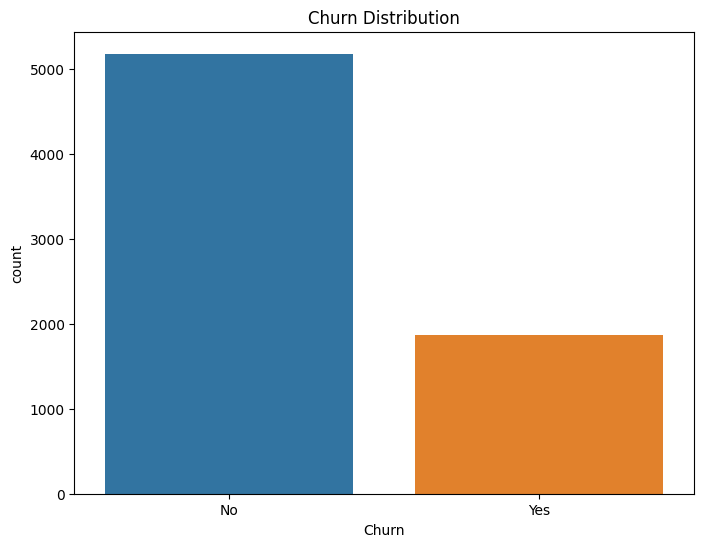

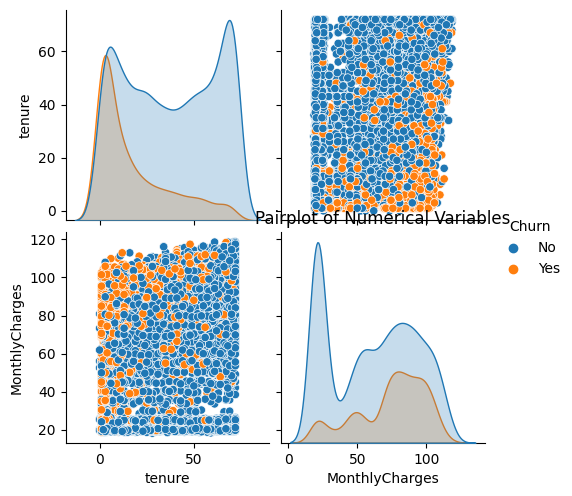

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Telco-Customer-Churn.csv")

# Identify important columns (customize this based on your analysis needs)
important_columns = ['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Subset the data to include only important columns
subset_data = data[important_columns]

# Visualize the distribution of 'Churn' using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x="Churn", data=subset_data)
plt.title("Churn Distribution")
plt.show()

# Pairplot to visualize relationships between numerical variables
sns.pairplot(subset_data, hue="Churn")
plt.title("Pairplot of Numerical Variables")
plt.show()


In [3]:
import pandas as pd

# Apply one-hot encoding for all necessary columns
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6560 entries, SeniorCitizen to Churn_Yes
dtypes: bool(6557), float64(1), int64(2)
memory usage: 44.2 MB
None
   SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0              0       1           29.85        False         True   
1              0      34           56.95         True        False   
2              0       2           53.85         True        False   
3              0      45           42.30         True        False   
4              0       2           70.70        False        False   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0           False             False                            True   
1           False              True                           False   
2           False              True                           False   
3           False             False                            True   
4           False              T

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("Telco-Customer-Churn.csv")


# List of categorical columns to one-hot encode
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform one-hot encoding for the specified columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split the dataset into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top N important features
top_n = 10  # Change this number to display more or fewer features
top_features = feature_importance_df.head(top_n)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features for Churn Prediction')
plt.show()


ValueError: could not convert string to float: ' '

In [11]:
print(data.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [14]:


# Identify blank (empty) values
blank_columns = data.columns[data.isna().any()].tolist()

print("Columns with blank values:")
for column in blank_columns:
    print(column)


Columns with blank values:
